### Codes used to reproduce results in Chapter 1 in the textbook

Let us study the effect of $k$ and $V$ in a convection-diffusion equation
$$c \partial_t \theta + c V \partial_x \theta - k \partial_{xx} \theta = 0,\qquad \theta(t=0, x) = \theta_0(x)$$
Let $\nu = k/c$, then the exact solution is
$$\theta(t,x) = \frac{1}{\sqrt{4\pi\nu t}} \int \exp\big(-\frac{(x - V t -y)^2}{4\nu t}\big)\theta_0(y) dy$$
Consider $\theta(0,x) = \max(1-x^2,0)$ as an example.

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation

c = 1.0

def comp_theta(t, x, k, V):
    # input t is a number
    # x is an array
    if k > 1.0e-4:
        ν = k/c
        values = np.zeros(len(x))
        for j in range(len(x)):
            values[j], _ = integrate.quad(lambda y: np.exp(-(x[j]-V*t-y)**2/(4*ν*t))*(1-y**2), -1, 1)
            values[j] = values[j]/np.sqrt(4*np.pi*ν*t)
        return values
    else:
        return np.maximum(1-(x - V*t)**2,0)

## Task 1: Study the role of $k$ and $V$

In [2]:
def show_anim_for_convection_diffusion(k, V):
    x = np.linspace(-3,3,100)
    u = np.maximum(1-x**2,0)

    fig, ax = plt.subplots()
    ax.set_xlabel('Position')
    ax.set_ylabel('Temperature')
    line, = ax.plot(x, u)
    ax.set_xlim([-3,3])
    ax.set_ylim([-0.1,1.2])

    def update_solution(frame):
        global u
        u = comp_theta(frame, x, k, V)
        line.set_ydata(u)
        ax.set_title("Time = {:.2f}".format(frame))
        return line,
    animation = FuncAnimation(fig, update_solution, \
                              frames=np.arange(0.1, 2, 0.01), interval=20)

    # %matplotlib ipympl
    plt.show()
    plt.close()

#### Case 1: Change the parameter $k$ and see what you can find

In [3]:
matplotlib.use('TkAgg')
# matplotlib.use('WebAgg')

# k = 0.01, V = 1.0
show_anim_for_convection_diffusion(0.01, 1.0)

In [4]:
# k = 0.1, V = 1.0
show_anim_for_convection_diffusion(0.1, 1.0)

#### Case 2: Fix $V=0$ and there is no transport anymore

In [5]:
show_anim_for_convection_diffusion(0.05, 0.0)

In [6]:
show_anim_for_convection_diffusion(0.1, 0.0)

In [7]:
show_anim_for_convection_diffusion(1.0, 0.0)

## Task 2: Demonstration of CFL condition for heat equations

In [8]:
def ftcs(ν, V, xL, xR, dt, Nx, T, u0):
    """
    ν: coefficient in heat equation
    V: the velocity
    xL: left boundary of x
    xR: right boundary of x
    dt: time step size
    Nx: number of spatial grid points
    T: total time
    u0: initial temperature distribution
    """
    
    # Initialize the grid and allocate memory for u at all future times
    dx = (xR-xL)/(Nx)
    x = np.linspace(xL, xR, Nx+1)
    u = np.zeros((int(T/dt)+1, Nx+1))
    u[0,:] = u0

    for n in range(int(T/dt)):
        un = u[n, :]  # Temperature at current time-step
        un_plus_1 = un.copy()  # Initialize the next time-step array

        # Apply boundary conditions here if necessary

        # Interior points
        for i in range(1, Nx-1):
            if V >= 0:
                un_plus_1[i] = un[i] - V*dt/(dx) *(un[i]-un[i-1]) \
                    + ν*dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1])
            else:
                un_plus_1[i] = un[i] - V*dt/(dx) *(un[i+1]-un[i]) \
                    + ν*dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1])

        # Update the temperature field
        u[n+1, :] = un_plus_1
        
    return u

In [9]:
Nx = 100
xL = -10
xR = 10
x = np.linspace(xL, xR, Nx+1)
V = 0.0
T = 1.0  # Total time
ν = 1.0  # Thermal diffusivity
u0 = np.maximum(1-x**2,0)  # Initial temperature distribution
dx = (xR-xL)/Nx

# critical dt
dt_c = dx**2/(2*ν)
print("Critical Δt from the prediction from CFL condition = {:.3f}".format(dt_c))

plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,1)
dt = dt_c*0.1
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
ax.set_ylabel('Temperature')
plt.legend()

ax = plt.subplot(1,3,2)
dt = dt_c*0.95
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()

ax = plt.subplot(1,3,3)
dt = dt_c*1.05
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()

plt.tight_layout()
%matplotlib ipympl
plt.show()

Critical Δt from the prediction from CFL condition = 0.020


## Task 3: Demonstration of CFL-like condition for the transport equation

Critical Δt from the prediction from CFL condition = 0.050


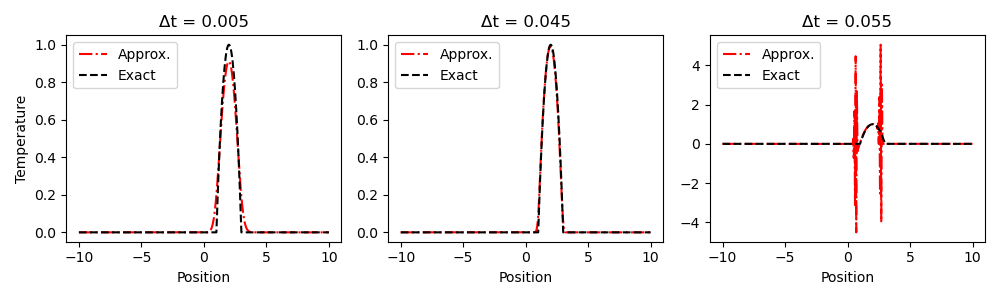

In [10]:
Nx = 400
dx = (xR-xL)/Nx
x = np.linspace(xL, xR, Nx+1)
V = 1.0
T = 2.0  # Total time
ν = 0.0  # Thermal diffusivity

u0 = np.maximum(1-x**2,0)  # Initial temperature distribution
print("Critical Δt from the prediction from CFL condition = {:.3f}".format(dx/V))

plt.figure(figsize=(10,3))

ax = plt.subplot(1,3,1)
dt = 0.1*dx/np.abs(V)
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
ax.set_ylabel('Temperature')
plt.legend()

ax = plt.subplot(1,3,2)
dt = 0.9*dx/np.abs(V)
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()

ax = plt.subplot(1,3,3)
dt = 1.1*dx/np.abs(V)
u_sol = ftcs(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()
plt.tight_layout()


%matplotlib ipympl
plt.show()

In [11]:
def ftcs_unstable(ν, V, xL, xR, dt, Nx, T, u0):
    """
    ν: coefficient in heat equation
    V: the velocity
    xL: left boundary of x
    xR: right boundary of x
    dt: time step size
    Nx: number of spatial grid points
    T: total time
    u0: initial temperature distribution
    """
    
    # Initialize the grid and allocate memory for u at all future times
    dx = (xR-xL)/(Nx)
    x = np.linspace(xL, xR, Nx+1)
    u = np.zeros((int(T/dt)+1, Nx+1))
    u[0,:] = u0

    for n in range(int(T/dt)):
        un = u[n, :]  # Temperature at current time-step
        un_plus_1 = un.copy()  # Initialize the next time-step array

        # Apply boundary conditions here if necessary

        # Interior points
        for i in range(1, Nx-1):
            if V >= 0:
                un_plus_1[i] = un[i] - V*dt/(dx) *(un[i+1]-un[i]) + ν*dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1])
            else:
                un_plus_1[i] = un[i] - V*dt/(dx) *(un[i]-un[i-1]) + ν*dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1])

        # Update the temperature field
        u[n+1, :] = un_plus_1
        
    return u

#### The scheme is unstable

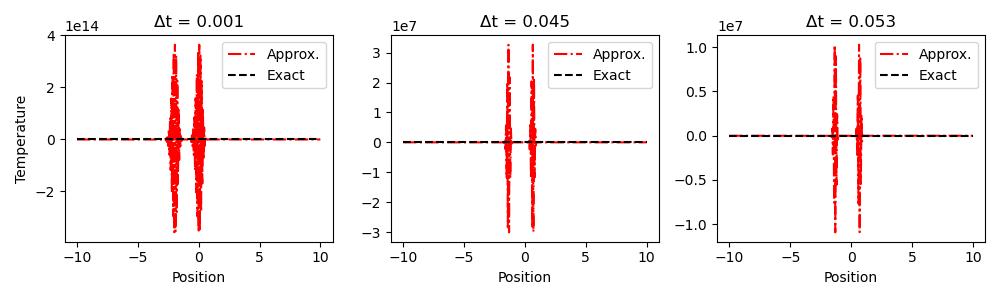

In [12]:
Nx = 400
dx = (xR-xL)/Nx
x = np.linspace(xL, xR, Nx+1)
V = 1.0
T = 1.0  # Total time
ν = 0.0  # Thermal diffusivity
u0 = np.maximum(1-x**2,0)  # Initial temperature distribution

plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,1)
dt = 0.01*dx/np.abs(V)  # Time step size
u_sol = ftcs_unstable(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
ax.set_ylabel('Temperature')
plt.legend()

ax = plt.subplot(1,3,2)
dt = 0.9*dx/np.abs(V)  # Time step size
u_sol = ftcs_unstable(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()

ax = plt.subplot(1,3,3)
dt = 1.05*dx/np.abs(V)  # Time step size
u_sol = ftcs_unstable(ν, V, xL, xR, dt, Nx, T, u0)
plt.plot(x, u_sol[-1,:], 'r-.', label="Approx.")
plt.plot(x, comp_theta(T, x, ν, V), 'k--', label="Exact")
plt.title("Δt = {:.3f}".format(dt))
ax.set_xlabel('Position')
plt.legend()

plt.tight_layout()
%matplotlib ipympl
plt.show()